In [5]:
import os
import sys
import argparse
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

pathdata = '~/.datasets'
namedataset = 'affectnet'
filedata = 'Manually_Annotated_file_lists'

pathdata = os.path.expanduser( pathdata )
pathnamedataset = os.path.join( pathdata, namedataset )
pathfiledata = os.path.join( pathnamedataset, filedata )

print(pathnamedataset)
print(pathfiledata)


/home/pdmf/.datasets/affectnet
/home/pdmf/.datasets/affectnet/Manually_Annotated_file_lists


In [14]:

pathnamedataset_train = os.path.join( pathfiledata, 'training.csv' )
pathnamedataset_val = os.path.join( pathfiledata, 'validation.csv' )

print(pathnamedataset_val)

data = pd.read_csv( pathnamedataset_val )
data.head()


/home/pdmf/.datasets/affectnet/Manually_Annotated_file_lists/validation.csv


,subDirectory_filePath,face_x,face_y,face_width,face_height,facial_landmarks,expression,valence,arousal
0,459/81456263be241927c7a59a2646f88c2700ce4b7cba...,147,147,981,981,233.58;512.99;246.97;623.96;262.53;733.87;285....,7,-0.653310,0.653310
1,680/cfa0c679da3dbe9f01e92cdeda2da1065aa50e7bf0...,99,99,666,666,98.98;341.86;107.43;422.6;123.41;503.32;144.97...,0,-0.176846,-0.077640
2,1042/83dac9d7eec7fb0bfef79b4d35ddc69a6f7fb458d...,16,16,133,133,42.69;79.9;42.94;90.59;43.83;101.27;44.2;112.5...,0,-0.367789,0.183895
3,887/49e4872adc501d5e69b8898930bbd4f4e037022874...,78,78,522,522,49.66;304.48;48.91;361.36;52.08;421.7;64.76;48...,4,-0.062911,0.532327
4,1057/0745dd0386476ae193ca709034378c9207e48ae88...,36,36,258,258,21.82;115.14;18.22;152.92;20.65;190.43;26.14;2...,0,0.004839,-0.004839


In [16]:
data['subDirectory_filePath'][0]

'459/81456263be241927c7a59a2646f88c2700ce4b7cba6094570ec2b10c.jpg'

In [ ]:
# Neutral 80,276
# Happy 146,198
# Sad 29,487
# Surprise 16,288
# Fear 8,191
# Disgust 5,264
# Anger 28,130
# Contempt 5,135
# None 35,322
# Uncertain 13,163
# Non-Face 88,895

['Neutral' 'Happy' 'Surprise' 'Sad' 'Anger' 'Disgust' 'Fear' 'Contempt'
 'None' 'Uncertain' 'Non-Face']
11


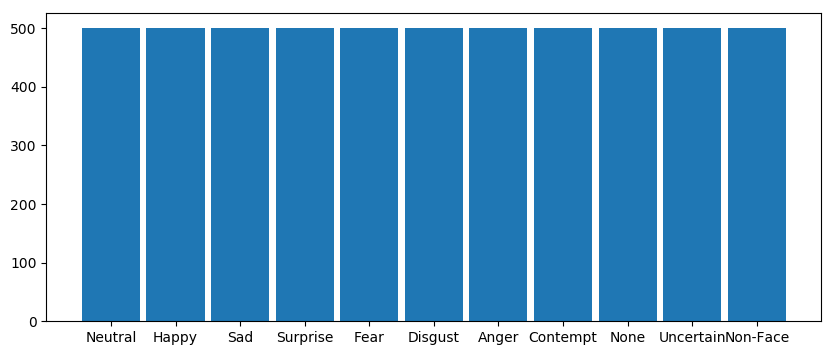

In [29]:
#emotion_name = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear', 'contempt', 'None', 'Uncertain', 'Non-Face' ]
emotion_name = ['Neutral',  'Happy',     'Sad',      'Surprise', 'Fear', 'Disgust', 'Anger', 'Contempt', 'None', 'Uncertain', 'Non-Face' ]
emo2ck = [0,1,3,2,6,5,4,7,8,9,10]
print( np.array(emotion_name)[ np.array(emo2ck) ]  )

labels = [d for d in data['expression'] ] 

# Count frequency of each label
labels, counts = np.unique(labels, return_counts=True)
print(len(counts))

# Plot the histogram
plt.rcParams["figure.figsize"] = [10, 4]
axes = plt.gca()
axes.set_xlim([-1,11])

plt.bar(labels, counts,  tick_label=emotion_name, width=0.9, align='center')
#plt.title('Class Distribution across Training Data')
plt.show()

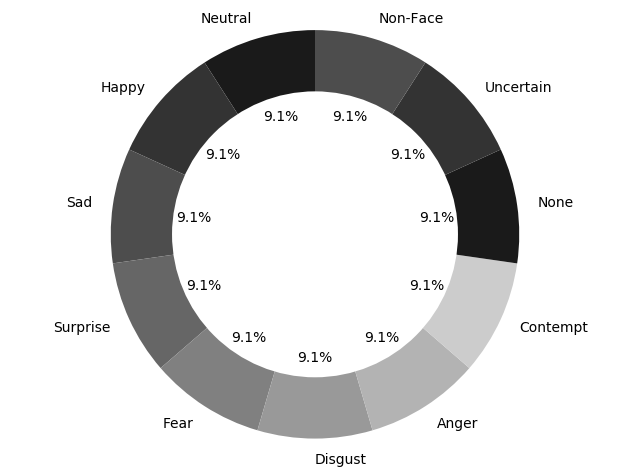

In [30]:
plt.style.use('default')

emotion_name = ['Neutral',  'Happy',     'Sad',      'Surprise', 'Fear', 'Disgust', 'Anger', 'Contempt', 'None', 'Uncertain', 'Non-Face' ]
colors =  np.array(['#1A1A1A','#333333','#4D4D4D','#666666', '#808080', '#999999', '#B3B3B3', '#CCCCCC']) #'#E6E6E6'
indx = np.array([0,7,1,2,5,3,4,6], dtype=np.int)

fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=emotion_name, autopct='%1.1f%%', startangle=90, colors = colors)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
# plt.savefig('../out/ferp_frec.eps')
plt.show()

